#### IN this project i going to analyze the stock price of Volkswagen, porsche, and bmw by using time series analysis. we will try to find correlation between each stocks mentioned above. and try to find the reason behind correlation exist between them that exist in different time period. And the main goal of this is that how time invariant pattern changes after adding new data.

# volkswagen and porsche

- Volkswagen is a German based automobile manufacture company based on wolfsburg, lower saxony, germany.
- established in 1937 by the German labour front party under nazi government.
- this company became world most largest automotive saler in 2016 and 2017.
- In 2000-2016: volkswagen launched a sereis of cars.
- In 2005: porsche announced that it would increase 5% stake at volkeswagen to 20% then
- In 2006: porsche stakes increases from 20% to 25.1% in volkeswagen.
- In 2007: volkeswagen seo changed from  Bernd Pischetsrieder to audi worldwide ceo martin wintorkon.
- In 2007: US had forced volkswagen to drop most diesel from most us engine lineups.
- In march 2007: porsche took its holding of volkswagen stakes to 30.9%.
- In 2008: company became the third largest company in world.
- In 2008: porsche held 42.6% of VW ordinary shares and stock option of 31.5% combined with state of lower saxony's 20.1% stake. it left only 5.8%.
- In 2009: But new engine compatible with us standard come to us market.
- In jan 2009: porsche had 50.76% holding in VW.
- IN may 2009: porsche and VW decided to join in merger.
- In oct 2009: VW announced that its holding in porsche would be 49.9% for the cost of \$3.9Bilion.
- In 2010: market share of 11.4%.
- IN may 2011: volkswagen established a new assembly plant in tennessee. after that they invest $900milion on floor space to the factory.
- In 2011: company implement new rule for improving work life balance of workers.
- IN 2011-12-13: volkeswagen announced to launch disel-electric hybrid model in the market.
- In Sept 2015: the company engulfed into an scandal. it is also called volkes wagen emmmision scaldal or dieselgate scadal. In this scandal it is found out that during laboratory examination of toxic gas emmision, the each model was emmiting a software controled gas amount which will meet us standard emmiting limit. and the company was fitted this software in around 11 million cards worldwide since 2009. acutal emmmision was more than 40 times no2 than real world driving.
- IN late 2016: volkes-wagen launched a large crossover suv to help losses in US.
- IN 2017: company start foucusing on electric vehicle. 
- for a long time volkswagen market share around 20%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import scipy
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import scipy.stats
import pylab
import matplotlib as mpl
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm
from arch import arch_model
import yfinance
import datetime
from pmdarima.arima import auto_arima
sns.set()

In [2]:
raw_data=yfinance.download(tickers="VOW3.DE PAH3.DE BMW.DE",interval='1d',group_by='ticker',auto_adjust=True,threads=True
                          )
df=raw_data.copy()

[*********************100%***********************]  3 of 3 completed


In [3]:
df_comp=df.copy()

In [4]:
df_comp.shape

(7173, 15)

In [5]:
df_comp.head()

Ticker                    PAH3.DE                          BMW.DE            \
Price                        Open High Low Close Volume      Open      High   
Date                                                                          
1996-11-08 00:00:00+00:00     NaN  NaN NaN   NaN    NaN  8.117677  8.117677   
1996-11-11 00:00:00+00:00     NaN  NaN NaN   NaN    NaN  8.108761  8.113219   
1996-11-12 00:00:00+00:00     NaN  NaN NaN   NaN    NaN  8.095833  8.170279   
1996-11-13 00:00:00+00:00     NaN  NaN NaN   NaN    NaN  8.177410  8.177410   
1996-11-14 00:00:00+00:00     NaN  NaN NaN   NaN    NaN  8.115449  8.152894   

Ticker                                                 VOW3.DE                 \
Price                           Low     Close   Volume    Open High Low Close   
Date                                                                            
1996-11-08 00:00:00+00:00  8.100292  8.100292   767000     NaN  NaN NaN   NaN   
1996-11-11 00:00:00+00:00  8.060617  8.078447   260000     NaN  NaN NaN   NaN   
1996-11-12 00:00:00+00:00  8.065074  8.139521  1066000     NaN  NaN NaN   NaN   
1996-11-13 00:00:00+00:00  8.108760  8.126591   793000     NaN  NaN NaN   NaN   
1996-11-14 00:00:00+00:00  8.082907  8.152894   351000     NaN  NaN NaN   NaN   

Ticker                            
Price                     Volume  
Date                              
1996-11-08 00:00:00+00:00    NaN  
1996-11-11 00:00:00+00:00    NaN  
1996-11-12 00:00:00+00:00    NaN  
1996-11-13 00:00:00+00:00    NaN  
1996-11-14 00:00:00+00:00    NaN

### Defining key dates

In [6]:
start_date="2009-04-05" # starting of the observation of stack price of vow,por,bmw.
ann_1='2009-12-09' # first official announcement of the '49.9%' acquitision porsche by volkswagen.
ann_2='2012-07-05' # second official anouncement of the rest of the '50.1%' acquitision of porsche by volkswagen. 
end_date='2014-01-01' # final date of observation of stock price of these 3 company.
d_gate="2015-09-20" # dieselgate scandal.

In [7]:
df_comp=df_comp["2009-04-05":]

## Preprocessing

In [8]:
df_comp["vow"]=df_comp["VOW3.DE"].Close
df_comp["por"]=df_comp["PAH3.DE"].Close
df_comp["bmw"]=df_comp["BMW.DE"].Close

## Creating return

In [9]:
df_comp['ret_vow']=df_comp.vow.pct_change(1).mul(100)
df_comp['ret_por']=df_comp.por.pct_change(1).mul(100)
df_comp['ret_bmw']=df_comp.bmw.pct_change(1).mul(100)

## Creating square Return

In [10]:
df_comp['sq_ret_vow']=np.square(df_comp['ret_vow'])
df_comp['sq_ret_por']=np.square(df_comp['ret_por'])
df_comp['sq_ret_bmw']=np.square(df_comp['ret_bmw'])

## Extracing the Volume of product sold 

In [11]:
df_comp["q_vow"]=df_comp["VOW3.DE"].Volume
df_comp["q_por"]=df_comp["PAH3.DE"].Volume
df_comp["q_bmw"]=df_comp["BMW.DE"].Volume

## Assigning the frequency and filling na values.

In [12]:
df_comp.index=df_comp.index.date

In [13]:
df_comp=df_comp.asfreq('b')

In [14]:
df_comp.columns.values

array([('PAH3.DE', 'Open'), ('PAH3.DE', 'High'), ('PAH3.DE', 'Low'),
       ('PAH3.DE', 'Close'), ('PAH3.DE', 'Volume'), ('BMW.DE', 'Open'),
       ('BMW.DE', 'High'), ('BMW.DE', 'Low'), ('BMW.DE', 'Close'),
       ('BMW.DE', 'Volume'), ('VOW3.DE', 'Open'), ('VOW3.DE', 'High'),
       ('VOW3.DE', 'Low'), ('VOW3.DE', 'Close'), ('VOW3.DE', 'Volume'),
       ('vow', ''), ('por', ''), ('bmw', ''), ('ret_vow', ''),
       ('ret_por', ''), ('ret_bmw', ''), ('sq_ret_vow', ''),
       ('sq_ret_por', ''), ('sq_ret_bmw', ''), ('q_vow', ''),
       ('q_por', ''), ('q_bmw', '')], dtype=object)

In [15]:
df_comp.drop(columns=['PAH3.DE','BMW.DE','VOW3.DE'],inplace=True)

C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [16]:
df_comp.columns.values

array([('vow', ''), ('por', ''), ('bmw', ''), ('ret_vow', ''),
       ('ret_por', ''), ('ret_bmw', ''), ('sq_ret_vow', ''),
       ('sq_ret_por', ''), ('sq_ret_bmw', ''), ('q_vow', ''),
       ('q_por', ''), ('q_bmw', '')], dtype=object)

In [17]:
df_comp.shape

(4064, 12)

In [18]:
df_comp=df_comp.fillna(method='bfill')

In [19]:
df_comp.index.max(),df_comp.index.min()

(Timestamp('2024-10-31 00:00:00', freq='B'),
 Timestamp('2009-04-06 00:00:00', freq='B'))

## Ploting the Price of each stocks.

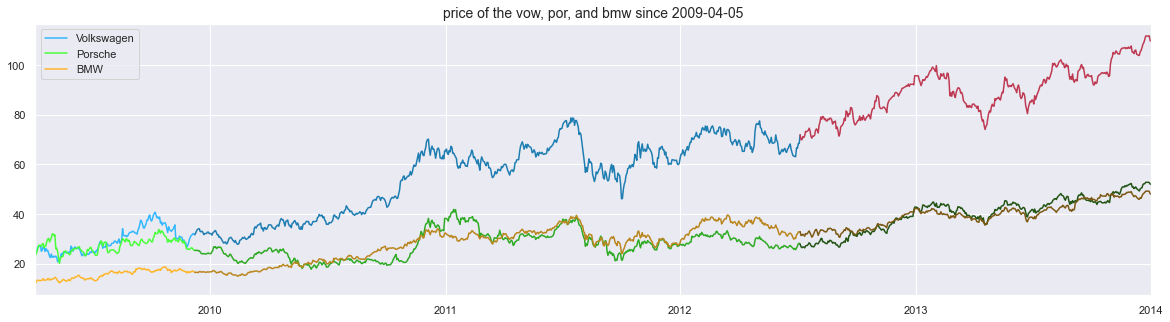

In [20]:
plt.figure(figsize=(20,5))
df_comp[start_date:ann_1].vow.plot(color='#33B8FF')
df_comp[start_date:ann_1].por.plot(color='#49FF3A')
df_comp[start_date:ann_1].bmw.plot(color='#FEB628')

df_comp[ann_1:ann_2].vow.plot(color='#1E7EB2')
df_comp[ann_1:ann_2].por.plot(color='#2FAB25')
df_comp[ann_1:ann_2].bmw.plot(color='#BA861F')

df_comp[ann_2:end_date].vow.plot(color='#BE3A52')
df_comp[ann_2:end_date].por.plot(color='#225414')
df_comp[ann_2:end_date].bmw.plot(color='#7C5913')

plt.legend(['Volkswagen','Porsche','BMW'])
plt.title(f"price of the vow, por, and bmw since {start_date}",size=14)
plt.show()

#### ***Observation***
- Upto late 2009: volkeswagen and porche has similar stock price. reason behind this might be the stake that porche had in volkswagen company it was around 50%. and in may month of 2009 they also decide to join in merger and on 2009-12-09 the volkeswagen announced that they will have 49.9% hold in porche stocks. Since they always been somehow related interms stake they have in each other company so all the invester had same behavior for each company. and the reason they have greter price than bmw cause together they had huge market share in entire world which around 11%.
- After 2010: porche and BMW has kind of similar trends and seasonality and difference between volkswagen and porsche become wider with time. the reason is that after buying 49.9% of porsche shares the volkeswagen become biggest market share holder in diesel vehicle manufacturing industries. So volkswagen stock become market benchmark after bmw. So their stock price increases after each annoucement of acquitision of prosche share by volkswagen. since invester find stability in this stock.
- But one observation which is really amazing to see is that after each announcement of  acquitision of porsche's share by volkswagen, the price value and trend of porsche and bmw was became more similar. further investigation is needed to find the reason behind this. 

### correlation between stockes from (2009-04-05 - 2014-12-05)

In [21]:
print(f'overall correlation between stocks')
print(f'correlation between vow an por (2009-04-05:2014-12-05) \t',df_comp[start_date:end_date]['vow'].corr(df_comp[start_date:end_date]['por']))
print(f'correlation between vow an bmw (2009-04-05:2014-12-05) \t',df_comp[start_date:end_date]['vow'].corr(df_comp[start_date:end_date]['bmw']))
print(f'correlation between bmw an por (2009-04-05:2014-12-05) \t',df_comp[start_date:end_date]['bmw'].corr(df_comp[start_date:end_date]['por']))

print(f'\nbefore first announcement')
print(f'correlation between vow an por (2009-04-05:2009-12-09) \t',df_comp[:ann_1]['vow'].corr(df_comp[:ann_1]['por']))
print(f'correlation between vow an bmw (2009-04-05:2009-12-09) \t',df_comp[:ann_1]['vow'].corr(df_comp[:ann_1]['bmw']))
print(f'correlation between bmw an por (2009-04-05:2009-12-09) \t',df_comp[:ann_1]['bmw'].corr(df_comp[:ann_1]['por']))

print(f'\nafter first announcement and before second anncement')
print(f'correlation between vow an por (2009-12-09:2012-07-05) \t',df_comp[ann_1:ann_2]['vow'].corr(df_comp[ann_1:ann_2]['por']))
print(f'correlation between vow an bmw (2009-12-09:2012-07-05) \t',df_comp[ann_1:ann_2]['vow'].corr(df_comp[ann_1:ann_2]['bmw']))
print(f'correlation between bmw an por (2009-12-09:2012-07-05) \t',df_comp[ann_1:ann_2]['bmw'].corr(df_comp[ann_1:ann_2]['por']))

print(f'\nafter second annoucement before end date of observation')
print(f'correlation between vow an por (2012-07-05:2014-01-01) \t',df_comp[ann_2:end_date]['vow'].corr(df_comp[ann_2:end_date]['por']))
print(f'correlation between vow an bmw (2012-07-05:2014-01-01) \t',df_comp[ann_2:end_date]['vow'].corr(df_comp[ann_2:end_date]['bmw']))
print(f'correlation between bmw an por (2012-07-05:2014-01-01) \t',df_comp[ann_2:end_date]['bmw'].corr(df_comp[ann_2:end_date]['por']))

print(f'\nAfter diselgate scandal')
print(f'correlation between vow an por (2015-09-20:2016-09-20) \t',df_comp[d_gate:"2016-09-20"]['vow'].corr(df_comp[d_gate:"2016-09-20"]['por']))
print(f'correlation between vow an bmw (2015-09-20:2016-09-20) \t',df_comp[d_gate:"2016-09-20"]['vow'].corr(df_comp[d_gate:"2016-09-20"]['bmw']))
print(f'correlation between bmw an por (2015-09-20:2016-09-20) \t',df_comp[d_gate:"2016-09-20"]['bmw'].corr(df_comp[d_gate:"2016-09-20"]['por']))


overall correlation between stocks
correlation between vow an por (2009-04-05:2014-12-05) 	 0.8359547048990499
correlation between vow an bmw (2009-04-05:2014-12-05) 	 0.9799378223368165
correlation between bmw an por (2009-04-05:2014-12-05) 	 0.8052157871005998

before first announcement
correlation between vow an por (2009-04-05:2009-12-09) 	 0.6633584743756322
correlation between vow an bmw (2009-04-05:2009-12-09) 	 0.8427607628829338
correlation between bmw an por (2009-04-05:2009-12-09) 	 0.6095039642673714

after first announcement and before second anncement
correlation between vow an por (2009-12-09:2012-07-05) 	 0.7428267802238285
correlation between vow an bmw (2009-12-09:2012-07-05) 	 0.9795943045681212
correlation between bmw an por (2009-12-09:2012-07-05) 	 0.7042723371882629

after second annoucement before end date of observation
correlation between vow an por (2012-07-05:2014-01-01) 	 0.9405237095286915
correlation between vow an bmw (2012-07-05:2014-01-01) 	 0.92844472

#### ***Observation***
1. IN this correlatio analysis, correlation among each stocks is calculated for each interval before and after each acquitision annoucement, since after each annoucement of merging the stock price has changed drastically.
2. If we observe the correlation between them in the entire time then they have signifincant correlation with each other. vow and bmw has highest correlation reason might be that they are considered as market setters therefore they have similar trend and seasonality behaviour eventhough their stock price are very different.
#### lets analyze correlation between each other in each interval wise.
1. before first annoucement of mergeing acquitision of porsche's 49.9% by volkswagen, it is observed that vow and bmw has highest correlaiton than corr(vow,por) and corr(bmw, por). Reason is that vow and bmw is considerd as market setter so they will behave in exact same way as overall market will behave since there are only one market, so they have highest correlation coefficients.
2. After first annoucement and before second: correlation between porsche and volkwagen has increased since after acquitision of porsche's 49.9% of share by volkeswagen, market will treat these two stocks similarly. And correlation between bmw and por has also increased cuase as corr(bmw, vow) is highly correlated and corr(vow,por) highly correlated so this increament correlation between por and bmw is the in the indirect effect.
3. After second announcement of acquitision of 50.1% share of porsche by vow the correlation between vow and por increased again cause now poeple are now interpreting these stocks more similar compared to before. correlaiton between por and bmw has increaed also for the same reason indrect effect. But one thing to notice here is that correlation between vow and por has decreased. reason might be after acquitision of porsche the vow became more promising for invester so now they treating these two stocks differently.
4. After dieselgate scadal(2015-09-20): the correlaiton between bmw and vow has decreased significantly in next one year. since porsche has merged into the vow therefore correlation between porsche and bmw also has decreased. the reason behind this falls is that after dieselgate scandal, market does not considered vow as a market standard anymore but people consider bmw as they were before so the correlaiton between them has dropped.
5. Talking about dieselgate scandal: in 2015-09-20 it is found that vow had attached software system which will give a dellusion during laboratary test of vow cars to check that it has meet the us polution act standard or not. and they have installed this software in 11 millions of cars worldwide since 2009.

## Fitting best model

### for volkeswagen

In [26]:
mod_pr_pre_vow=auto_arima(df_comp.vow[start_date:ann_1],X=df_comp[['por','bmw']][start_date:ann_1],
                         m=5,max_p=5,max_q=5,suppress_warnings=False, 
                          error_action='warn'
                         )
mod_pr_btwn_vow=auto_arima(df_comp.vow[ann_1:ann_2],X=df_comp[['por','bmw']][ann_1:ann_2],
                         m=5,max_p=5,max_q=5,suppress_warnings=False, 
                          error_action='warn'
                         )
mod_pr_post_vow=auto_arima(df_comp.vow[ann_2:end_date],X=df_comp[['por','bmw']][ann_2:end_date],
                         m=5,max_p=5,max_q=5,suppress_warnings=False, 
                          error_action='warn'
                         )

C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

In [27]:
print(mod_pr_pre_vow.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -246.576
Date:                Thu, 31 Oct 2024   AIC                            503.153
Time:                        20:12:20   BIC                            519.062
Sample:                    04-06-2009   HQIC                           509.604
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4707      0.291      1.618      0.106      -0.100       1.041
por            0.2777      0.067      4.169      0.000       0.147       0.408
bmw            0.5584      0.265      2.107      0.0

### ***Observation***
- Best model found for prediciton of the stock price of volkswagen fitted on price before annoucement of porsche's 49.9% share acquitision is arima(1,0,0).
- Coefficient of each variable are significant so this model is reliable.
- This model can be considered as ARX model where only the price value of last period and two exogenous variable are considered to vow price prediction.
- Coefficient value of regression term is equal to 0.96 it means that current value of the vow are not randomaly fluctuating and it high correlation with last period values.
- Coefficient of bmw exog variable is also significant and its value is 0.559, which bascially says that current price of vow has significant correlation with price bmw of current period. it is also expected cuase these two stocks considerd as market indicator so they will behave in same ways.


In [28]:
print(mod_pr_btwn_vow.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -792.005
Date:                Thu, 31 Oct 2024   AIC                           1590.011
Time:                        20:12:25   BIC                           1603.537
Sample:                    12-09-2009   HQIC                          1595.250
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.5491      0.043     12.842      0.000       0.465       0.633
bmw            1.2498      0.059     21.268      0.000       1.135       1.365
sigma2         0.6205      0.025     24.532      0.0

### ***Observation***
- After the first accusaton announcement the price of vow became non-stationary for which how best arima model that found is arima(0,1,0).
- Which is a integration model that create a new stationary series by making the difference consecutive period values once.
- price of the each period is overly rely on exogeneous varible bmw price since they are market indicator. and the price of the vow neither rely on past value or past residual thus it is totally random and only depend upon market sentiments.

In [29]:
print(mod_pr_post_vow.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -440.785
Date:                Thu, 31 Oct 2024   AIC                            887.570
Time:                        20:12:28   BIC                            899.461
Sample:                    07-05-2012   HQIC                           892.284
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.1937      0.039     30.369      0.000       1.117       1.271
bmw            0.6920      0.074      9.381      0.000       0.547       0.837
sigma2         0.5646      0.028     20.461      0.0

### ***Observation***
- After 2nd annoucement of total acquitision of porsche by volkwagen, market price of the vow still maintains its non stationarity. For that best model found to fit the data in time interval after 2nd annoucement and end date of observation is a integration model which does not depend upon past value or past residuals.
- but it depend overly on porsche price since porche price are now merged into vow and coefficient of exogenous variable bmw has become less than it was before 2nd annoucement cause after acquitision the market price of vow is far higher than bmw now so correlation between them has decreased.
- The modle also has significant coefficients values so this model is reliable. 

### NOTE:
- By observing the all model parameter values and their interpretation we can says that with adding of new data model parameter values and interpretation changes.

### For porsche price

In [33]:
mod_pr_pre_por=auto_arima(df_comp.por[start_date:ann_1],X=df_comp[['vow','bmw']][start_date:ann_1],
                         m=5,max_p=5,max_q=5,suppress_warnings=False, 
                          error_action='warn'
                         )
mod_pr_btwn_por=auto_arima(df_comp.por[ann_1:ann_2],X=df_comp[['vow','bmw']][ann_1:ann_2],
                         m=5,max_p=5,max_q=5,suppress_warnings=False, 
                          error_action='warn'
                         )
mod_pr_post_por=auto_arima(df_comp.por[ann_2:end_date],X=df_comp[['vow','bmw']][ann_2:end_date],
                         m=5,max_p=5,max_q=5,suppress_warnings=False, 
                          error_action='warn'
                         )

C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

In [35]:
print(mod_pr_pre_por.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -214.313
Date:                Thu, 31 Oct 2024   AIC                            440.625
Time:                        20:55:45   BIC                            459.716
Sample:                    04-06-2009   HQIC                           448.367
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5395      0.352      1.533      0.125      -0.150       1.229
vow            0.1656      0.077      2.158      0.031       0.015       0.316
bmw            1.0249      0.184      5.557      0.0

### ***Observation***
- All the coefficient are significant.
- first coeff of AR term is neal to 1 which bascially says that the current price depend upon fully on past period along with price of bmw in current period. reason why bmw has significant correlaiton cause it considered as market indicator so thery would some correlation between porsche.

In [36]:
print(mod_pr_btwn_por.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -537.629
Date:                Thu, 31 Oct 2024   AIC                           1085.258
Time:                        20:55:56   BIC                           1107.802
Sample:                    12-09-2009   HQIC                          1093.989
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vow            0.2571      0.023     11.134      0.000       0.212       0.302
bmw            0.3855      0.054      7.200      0.000       0.281       0.490
ar.L1          0.6585      0.230      2.860      0.0

### ***Observation***
- After first annoucement of the acquitision of porsche shares by vow, the price of the porsche is fitted into an arima model to found to best model for price prediction.
- It is observed best model has all the coeffcients significant.
- this best model is a integration model. it means the price of porsche become non stationary after this annoucement.
- After analyzing the sign of the AR and MA model, it is found that coeff of AR is positive it means that up to certain time period price will keeps its momentum. and coeff of MA model is negative it means that if price is increased in last period then it will come down current period. it is called mean inversion.
- It is also rely on price of vow and bmw but not much as it depends upon past values.  

In [38]:
print(mod_pr_post_por.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  390
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 5)   Log Likelihood                -185.134
Date:                             Thu, 31 Oct 2024   AIC                            378.268
Time:                                     20:56:36   BIC                            394.122
Sample:                                 07-05-2012   HQIC                           384.553
                                      - 01-01-2014                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vow            0.3196      0.019     16.876      0.000       0.282       0.357
bmw            0.2911      

### ***Observation***
- After 2nd announcement of 50.1% acquitision of porsche shares a arima model is fitted with the price data obtained after 2nd acquitision.
- Best model that is found that is sarimax(order(0,1,0),seasonalorder(0,0,1,5))
- This model is a integration model which means that price is non-stationary.
- Has seasonality value of 5 with moving average lag for seaonal component is 1. coeffient of season-moving averge term is negative so if price at 5 lags away has increased then most probabily it will go down in current period.

#### NOTE:
- By observing all this model in different time period it is clear that market movement totally depend upon current idea/news rather than past value it is only the period before the 1st announcement where value of the porsche and vow depend upon past values but after that it become non stationary and hard to predict from past pattern.

## prediction of vow price after 1st announcement of porsche acquitision by volkwagen on the basis of data obtained before this acqusition event. 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -258.424
Date:                Thu, 31 Oct 2024   AIC                            522.849
Time:                        23:01:37   BIC                            532.377
Sample:                    04-06-2009   HQIC                           526.713
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0975      0.182      0.536      0.592      -0.259       0.454
drift         -0.0006      0.002     -0.363      0.717      -0.004       0.003
sigma2         1.0856      0.066     16.344      0.0

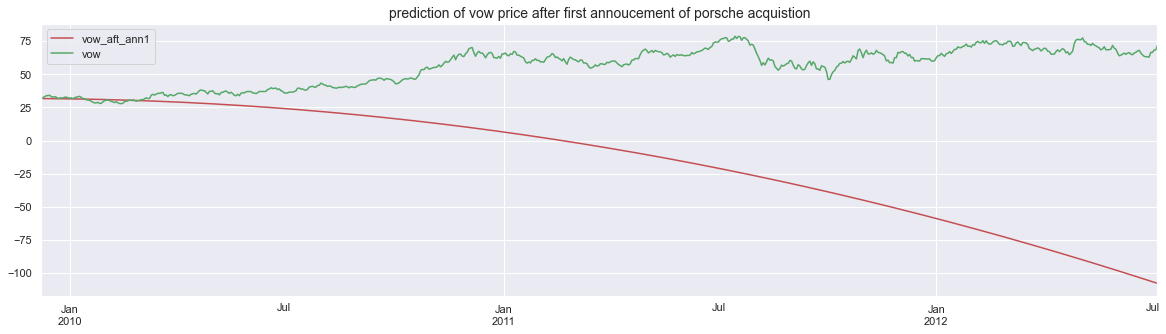

In [43]:
mod_pr_pre_vow=auto_arima(df_comp[start_date:ann_1]['vow'],
                         m=5,max_p=5,max_q=5,max_P=5,max_Q=5,trend='ct'
                         )
print(mod_pr_pre_vow.summary())
df_aft_ann1_vow=pd.DataFrame({'vow_aft_ann1':mod_pr_pre_vow.predict(n_periods=df_comp[ann_1:ann_2].index.shape[0])},
                                index=df_comp[ann_1:ann_2].index
                            )
df_aft_ann1_vow.vow_aft_ann1.plot(figsize=(20,5),color='r')
df_comp[ann_1:ann_2].vow.plot(color='g')
plt.title('prediction of vow price after first annoucement of porsche acquistion',size=14)
plt.legend()
plt.show()

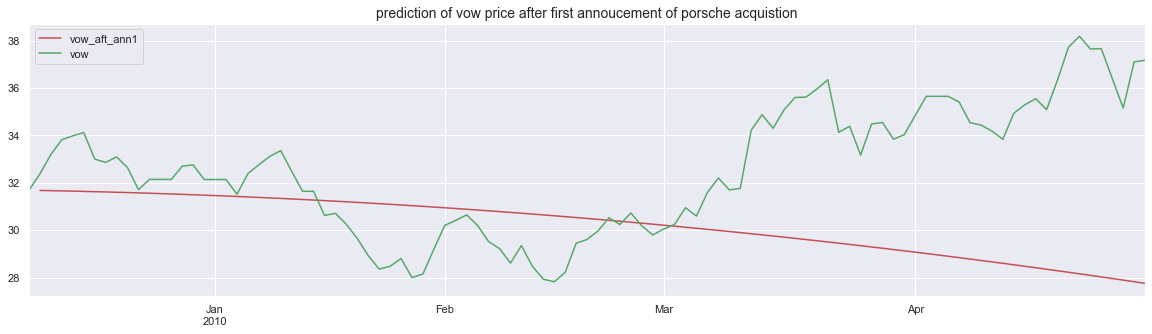

In [47]:
pre_time_strt=ann_1
pre_time_end="2010-05-01"
df_aft_ann1_vow=pd.DataFrame({'vow_aft_ann1':mod_pr_pre_vow.predict(n_periods=df_comp[pre_time_strt:pre_time_end].index.shape[0])},
                                index=df_comp[pre_time_strt:pre_time_end].index
                            )
df_aft_ann1_vow.vow_aft_ann1.plot(figsize=(20,5),color='r')
df_comp[pre_time_strt:pre_time_end].vow.plot(color='g')
plt.title('prediction of vow price after first annoucement of porsche acquistion',size=14)
plt.legend()
plt.show()

#### ***Observation***
- As we can observe that the model performing well in prediction of vow price upto month march of 2010 . but after that market sentiments changes vow price increased, which was not expected by the model, since as per the past vow price behavioural pattern , the price was going down.
- But why market takes around 3 month to change their sentiments eventhough merging announcement happened in "2009-12-09", because market change their behaviour on basis of current data so it may possible that people takes around 3 month to know about this merging information and to act accordingly.
- This is also called market delay.

#### Prediction of market price of vow after first announcement of porsche 49.9% share acquitision on basis of past data and incorporating porsche price as exogenous variable.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -247.466
Date:                Thu, 31 Oct 2024   AIC                            502.931
Time:                        23:27:58   BIC                            515.636
Sample:                    04-06-2009   HQIC                           508.084
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0627      0.158      0.397      0.691      -0.247       0.373
drift         -0.0002      0.001     -0.153      0.879      -0.003       0.003
por            0.3680      0.051      7.167      0.0

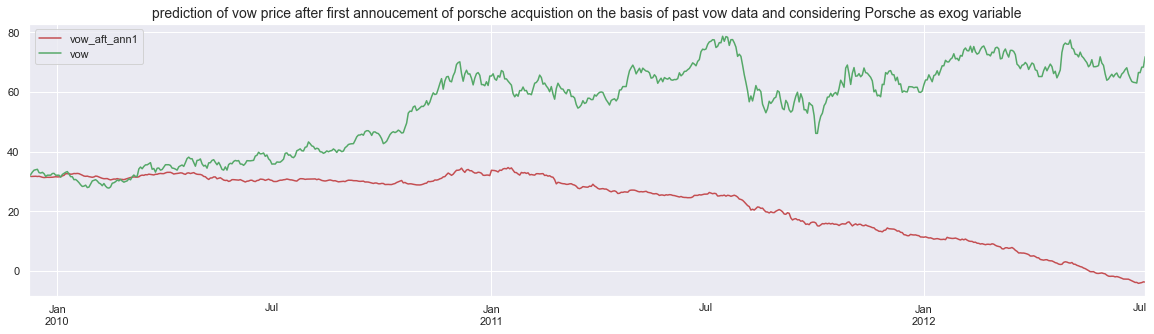

In [56]:
pre_time_strt=ann_1
pre_time_end=ann_2
mod_pr_pre_vow=auto_arima(df_comp[start_date:ann_1]['vow'],X=df_comp[start_date:ann_1][['por']],
                         m=5,max_p=5,max_q=5,max_P=5,max_Q=5,trend='ct'
                         )
print(mod_pr_pre_vow.summary())
df_aft_ann1_vow=pd.DataFrame({'vow_aft_ann1':mod_pr_pre_vow.predict(n_periods=df_comp[pre_time_strt:pre_time_end].index.shape[0],
                                                                    X=df_comp[pre_time_strt:pre_time_end][['por']])
                             },
                                index=df_comp[pre_time_strt:pre_time_end].index
                            )
df_aft_ann1_vow.vow_aft_ann1.plot(figsize=(20,5),color='r')
df_comp[pre_time_strt:pre_time_end].vow.plot(color='g')
plt.title('prediction of vow price after first annoucement of porsche acquistion on the basis of past vow data and considering Porsche as exog variable',size=14)
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -250.201
Date:                Thu, 31 Oct 2024   AIC                            510.402
Time:                        23:27:52   BIC                            526.311
Sample:                    04-06-2009   HQIC                           516.854
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7684      0.390      1.970      0.049       0.004       1.533
drift          0.0025      0.002      1.241      0.215      -0.001       0.006
bmw            0.8934      0.242      3.697      0.0

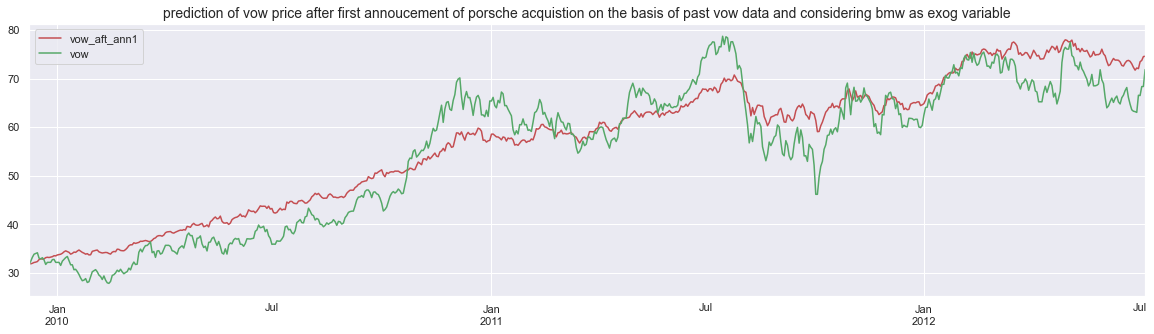

In [55]:
pre_time_strt=ann_1
pre_time_end=ann_2
mod_pr_pre_vow=auto_arima(df_comp[start_date:ann_1]['vow'],X=df_comp[start_date:ann_1][['bmw']],
                         m=5,max_p=5,max_q=5,max_P=5,max_Q=5,trend='ct'
                         )
print(mod_pr_pre_vow.summary())
df_aft_ann1_vow=pd.DataFrame({'vow_aft_ann1':mod_pr_pre_vow.predict(n_periods=df_comp[pre_time_strt:pre_time_end].index.shape[0],
                                                                    X=df_comp[pre_time_strt:pre_time_end][['bmw']])
                             },
                                index=df_comp[pre_time_strt:pre_time_end].index
                            )
df_aft_ann1_vow.vow_aft_ann1.plot(figsize=(20,5),color='r')
df_comp[pre_time_strt:pre_time_end].vow.plot(color='g')
plt.title('prediction of vow price after first annoucement of porsche acquistion on the basis of past vow data and considering bmw as exog variable',size=14)
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -244.720
Date:                Thu, 31 Oct 2024   AIC                            501.440
Time:                        23:37:33   BIC                            520.531
Sample:                    04-06-2009   HQIC                           509.182
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7385      0.354      2.086      0.037       0.045       1.432
drift          0.0035      0.002      1.616      0.106      -0.001       0.008
bmw            0.5179      0.269      1.922      0.0

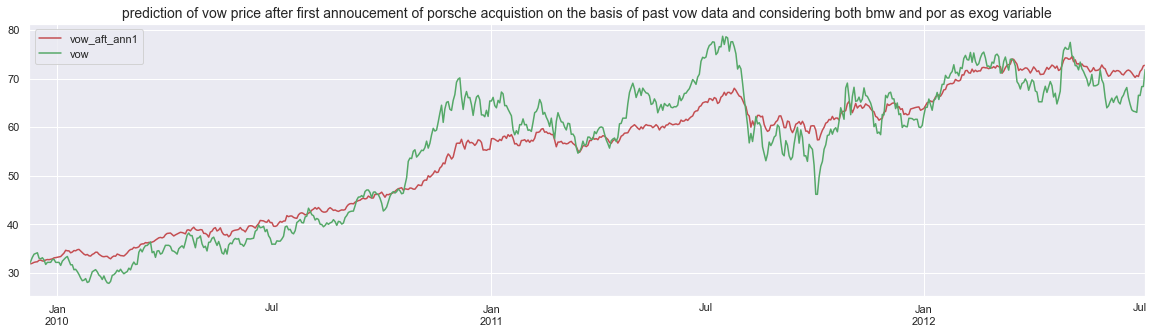

In [57]:
pre_time_strt=ann_1
pre_time_end=ann_2
mod_pr_pre_vow=auto_arima(df_comp[start_date:ann_1]['vow'],X=df_comp[start_date:ann_1][['bmw','por']],
                         m=5,max_p=5,max_q=5,max_P=5,max_Q=5,trend='ct'
                         )
print(mod_pr_pre_vow.summary())
df_aft_ann1_vow=pd.DataFrame({'vow_aft_ann1':mod_pr_pre_vow.predict(n_periods=df_comp[pre_time_strt:pre_time_end].index.shape[0],
                                                                    X=df_comp[pre_time_strt:pre_time_end][['bmw','por']])
                             },
                                index=df_comp[pre_time_strt:pre_time_end].index
                            )
df_aft_ann1_vow.vow_aft_ann1.plot(figsize=(20,5),color='r')
df_comp[pre_time_strt:pre_time_end].vow.plot(color='g')
plt.title('prediction of vow price after first annoucement of porsche acquistion on the basis of past vow data and considering both bmw and por as exog variable',size=14)
plt.legend()
plt.show()

### Observation 
- As we can see that by adding exogeneous variable can increase our prediciton effciency drastically.
- It is even sensitive to the small increase and decrease in price of actual vow price values.
#### NOTE
- Now lets make model to predict the price of vow after the second announcement on the basis of past values before second announcement.
- Also make a model to predict the price of vow after dieselgate scandal on the basis of past datas.

## volatility

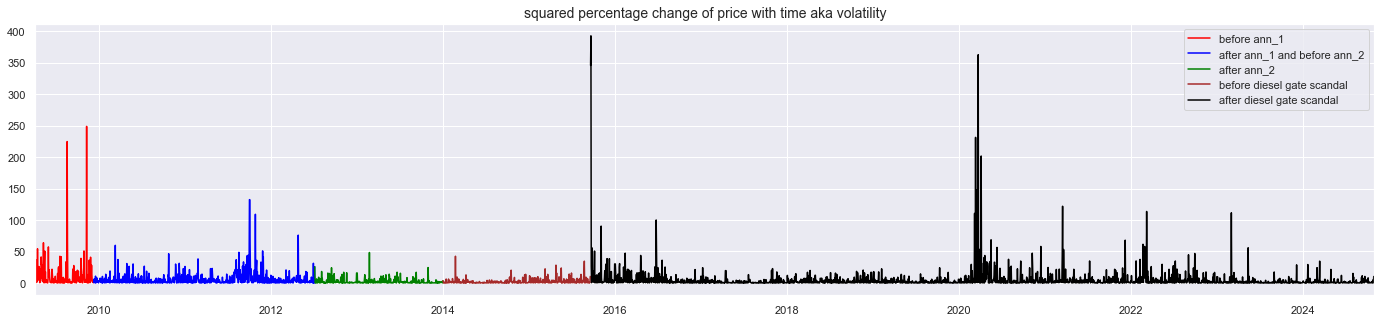

In [67]:
## since squared return can be considered as volatilty of a time series 
plt.figure(figsize=(24,5))
df_comp[start_date:ann_1].sq_ret_vow.plot(color='red')
df_comp[ann_1:ann_2].sq_ret_vow.plot(color='blue')
df_comp[ann_2:end_date].sq_ret_vow.plot(color='green')
df_comp[end_date:d_gate].sq_ret_vow.plot(color='brown')
df_comp[d_gate:].sq_ret_vow.plot(color='black')
plt.title('squared percentage change of price with time aka volatility',size=14)
plt.legend(['before ann_1','after ann_1 and before ann_2',"after ann_2",'before diesel gate scandal','after diesel gate scandal'])
plt.show()

### ***observation***
- By observing the volatility/squared percentage change of the vow price across time series, this is what comes into the notice.
  1. after and before each annoucement related to volkswagen, the price of the vow fluctuated in the market because of the rumour moves around in the market.
  2. before 1 st annoucement there is instability in the market before and after for some period.
  3. before 2nd announcement there is a fluctuation but after this there is less instabililty in the market. reason might be that after taking 100% of share of porsche by volkwagen, people are now sure that the vow stock will be in stable so eventually there were no fluctuation seen anymore till dgate scandal.
  4. after diesel gate scandal people mighe have lost their trust in vow so after this scandal taken into the limelight, then as consequence  instability in the market increased for vow stocks.

## Lets fit a garch model  for each interval

In [69]:
model_garch_pre_ann1_vow=arch_model(df_comp[start_date:ann_1]['vow'],mean='Constant',vol='GARCH',p=1,q=1)
results_garch_pre_ann1_vow=model_garch_pre_ann1_vow.fit(update_freq=5)

model_garch_pre_ann2_vow=arch_model(df_comp[ann_1:ann_2]['vow'],mean='Constant',vol='GARCH',p=1,q=1)
results_garch_pre_ann2_vow=model_garch_pre_ann2_vow.fit(update_freq=5)

model_garch_post_ann2_vow=arch_model(df_comp[ann_2:end_date]['vow'],mean='Constant',vol='GARCH',p=1,q=1)
results_garch_post_ann2_vow=model_garch_post_ann2_vow.fit(update_freq=5)

model_garch_post_dgatescndl_vow=arch_model(df_comp[d_gate:"2016-09-20"]['vow'],mean='Constant',vol='GARCH',p=1,q=1)
results_garch_post_dgatescndl_vow=model_garch_post_dgatescndl_vow.fit(update_freq=5)

Iteration:      5,   Func. Count:     34,   Neg. LLF: 472.0493194766596
Iteration:     10,   Func. Count:     59,   Neg. LLF: 464.3466481508175
Optimization terminated successfully    (Exit mode 0)
            Current function value: 464.34114309544753
            Iterations: 14
            Function evaluations: 78
            Gradient evaluations: 14
Iteration:      5,   Func. Count:     33,   Neg. LLF: 5475.765263240678
Iteration:     10,   Func. Count:     63,   Neg. LLF: 3881.5259773517732
Iteration:     15,   Func. Count:     92,   Neg. LLF: 2353.5387593191303
Iteration:     20,   Func. Count:    117,   Neg. LLF: 2352.6934271122
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2352.6934254287353
            Iterations: 22
            Function evaluations: 126
            Gradient evaluations: 22
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1289.2673753169831
Iteration:     10,   Func. Count:     56,   Neg. LLF: 1280.8080865563659
O

In [70]:
print(results_garch_pre_ann1_vow.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    vow   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -464.341
Distribution:                  Normal   AIC:                           936.682
Method:            Maximum Likelihood   BIC:                           949.409
                                        No. Observations:                  178
Date:                Fri, Nov 01 2024   Df Residuals:                      177
Time:                        00:57:04   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            26.4591      1.620     16.329  6.122e-60 [ 23.283, 29.63

In [71]:
print(results_garch_pre_ann2_vow.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    vow   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2352.69
Distribution:                  Normal   AIC:                           4713.39
Method:            Maximum Likelihood   BIC:                           4731.43
                                        No. Observations:                  672
Date:                Fri, Nov 01 2024   Df Residuals:                      671
Time:                        00:57:04   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            64.6102      0.397    162.673      0.000 [ 63.832, 65.38

In [72]:
print(results_garch_post_ann2_vow.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    vow   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1280.77
Distribution:                  Normal   AIC:                           2569.55
Method:            Maximum Likelihood   BIC:                           2585.41
                                        No. Observations:                  390
Date:                Fri, Nov 01 2024   Df Residuals:                      389
Time:                        00:57:04   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            91.9084      0.930     98.808      0.000 [ 90.085, 93.73

In [73]:
print(results_garch_post_dgatescndl_vow.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    vow   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -787.097
Distribution:                  Normal   AIC:                           1582.19
Method:            Maximum Likelihood   BIC:                           1596.47
                                        No. Observations:                  262
Date:                Fri, Nov 01 2024   Df Residuals:                      261
Time:                        00:57:05   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            69.4192      1.041     66.684      0.000 [ 67.379, 71.46